In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Ideas

Which occupations have had the largest % increase over a certain time period?
 - Plot these top gainers 
 
Which occupations have had the largest % decrease over a certain time period?
 - Plot these top losers

Top occupations by % increase vs occupations by top % decrease
 - Plot these 
 
Filter occupations by wealth creation

In [ ]:
labor = pd.read_csv('/Users/gabestechschulte/Downloads/labormarket.csv')
labor = labor.rename(columns={'Unnamed: 0': 'Year'})
labor['Year'] = pd.to_datetime(labor['Year'])
labor.set_index('Year', inplace=True)
labor.tail()

In [ ]:
yearly = labor.resample('A').last()
melt = yearly.reset_index().melt(id_vars = 'Year')

In [103]:
def plotter(df, occups=list):
    
    sub = df[df.variable.isin(occups)]
    
    plt.figure(figsize=(12, 9))
    sns.lineplot('Year', 'value', data = sub, hue = 'variable')


/Users/gabestechschulte/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


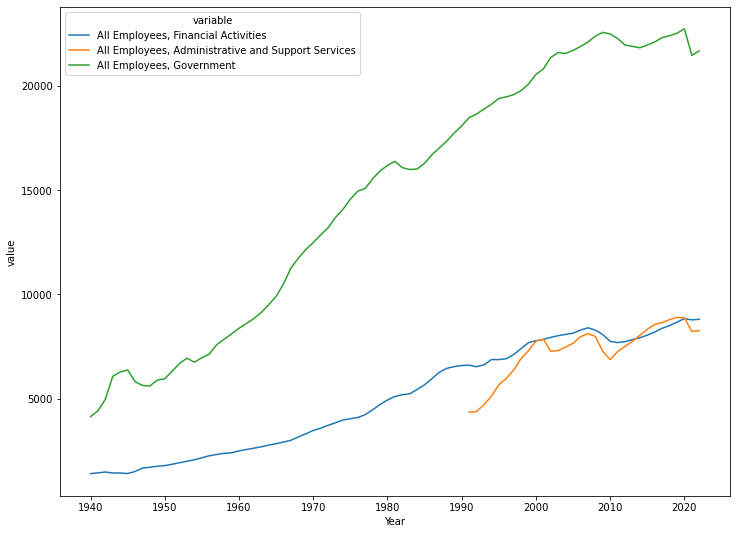

In [105]:
occs = ['All Employees, Financial Activities',
        'All Employees, Government',
        'All Employees, Administrative and Support Services']

plotter(melt, occs)

In [24]:
for col in labor.columns:
    print(col)

All Employees, Total Nonfarm
All Employees, Total Private
All Employees, Goods-Producing
All Employees, Private Service-Providing
All Employees, Coal Mining
All Employees, Oil and Gas Extraction
All Employees, Mining and Logging
All Employees, Mining
All Employees, Logging
All Employees, Support Activities for Mining
All Employees, Mining, Except Oil and Gas
All Employees, Construction
All Employees, Residential Building
All Employees, Nonresidential Building
All Employees, Heavy and Civil Engineering Construction
All Employees, Residential Specialty Trade Contractors
All Employees, Nonresidential Specialty Trade Contractors
All Employees, Specialty Trade Contractors
All Employees, Construction of Buildings
All Employees, Manufacturing
All Employees, Durable Goods
All Employees, Motor Vehicles and Parts
All Employees, Wood Products
All Employees, Semiconductors and Electronic Components
All Employees, Computer and Electronic Products
All Employees, Primary Metals
All Employees, Transpo